## 資料分析：探討台股的產業領先結構與輪動機制


在投資實務中，「產業輪動」一直是資金配置與選股的重要依據。隨著景氣週期的推移，市場資金往往會由領先產業逐步轉向後進產業，形成結構性的板塊輪動。例如在景氣復甦初期，原物料與景氣循環類股（如航運、鋼鐵）常率先反應，而隨著經濟持續擴張與企業資本支出增加，成長性產業如半導體、科技股則可能接棒上漲。

儘管此類輪動邏輯在總體經濟分析中廣泛被提及，但要精確辨識其「起點與終點」，仍需倚賴量化工具與實證資料輔助。本文將聚焦於多產業指數的歷史資料，透過 Transfer Entropy（轉移熵）、滾動相關係數等統計工具，分析不同行業之間是否存在穩定的領先－落後關係，並初步探討景氣信號燈在這些關係中的可能角色。

---

## 總經背景

台灣經濟結構高度依賴科技製造與出口導向產業，尤以半導體產業為主體。根據經濟部資料，台灣半導體產業在全球市占率高居前列，涵蓋上游 IC 設計、中游晶圓製造、下游封裝測試等完整供應鏈，並為台灣 GDP 與出口貢獻主要動能。因此，半導體產業的景氣循環與資金變化，常被視為觀察台灣股市甚至整體經濟的重要風向球。

然而，在不同的經濟階段中，市場資金並非總是集中於單一產業，而是會在各類板塊間進行切換與輪動。這種輪動現象可能受到多項總體經濟因素影響，例如：全球貿易活動變化、通膨壓力、利率政策、資本支出周期等。因此，若能掌握半導體與其他產業之間的相對變化關係，將有助於投資人在產業配置上做出更具前瞻性的決策。

基於這些理由，本文以半導體作為核心觀察指標，進一步檢驗其與其他產業（如金融保險、航運、生技醫療等）是否存在明確的領先—落後或輪動關係，並嘗試建構一套可操作的輪動預測架構。

---

## 產業資料分析方法

為進行產業輪動的實證分析，本文採用 TQuant Lab 所提供之歷史產業指數作為研究對象。該平台涵蓋台股市場中主要產業分類，包括半導體、電子、金融保險、航運、生技醫療等，並提供長期可回溯的日資料，適合作為輪動行為的分析基礎。

由於產業指數屬於價格型指標，長期趨勢通常呈現緩步上升，並非穩定於某個價格區間內震盪，因此若直接觀察價格資料，將不易辨識出相對強弱變化。為解決此問題，本文選擇對各產業指數進行相對強弱指數（Relative Strength Index, RSI）的計算。RSI 作為一種動能指標，能夠反映出某段期間內價格上漲與下跌的強度比例，進而識別出產業在不同時期的相對強勢與弱勢。

完成 RSI 指數轉換後，本文即以 RSI 時序資料為基礎，進一步進行三項分析：

1. **滾動相關係數（Rolling Correlation）視覺化**  
   以視覺化方式呈現產業 RSI 與半導體 RSI 在不同時期的相關性變化，有助於觀察輪動結構是否具有週期性、重複性或階段性轉變。

2. **滯後相關性分析（Lagged Correlation）**  
   計算產業 RSI 與半導體 RSI 在不同滯後期數下的相關性，觀察最大相關時的滯後時間點，輔助推測產業輪動的先後順序。

3. **Transfer Entropy（轉移熵）分析**  
   透過資訊理論方法，衡量各產業 RSI 對半導體 RSI 是否具有額外的預測力。藉由比較不同方向的資訊流強度，判斷是否存在潛在的產業輪動關係及資訊主導方向。

---

透過上述方法，本文試圖量化並驗證產業間是否存在具有時間差異的輪動邏輯，進而提供投資人在策略判斷上的參考依據。

本文使用 **2012 年初至 2019 年底** 作為研究產業輪動的分析資料，並以 **2020 年初至今** 作為策略回測的樣本資料，以免造成過擬合的情況。


In [ ]:
codes = [
    "IX0001", "IX0002", "IX0003", "IX0006", "IX0010", "IX0011", "IX0012",
    "IX0016", "IX0017", "IX0018", "IX0019", "IX0020", "IX0021", "IX0022",
    "IX0023", "IX0024", "IX0025", "IX0026", "IX0027", "IX0028", "IX0029",
    "IX0030", "IX0031", "IX0032", "IX0033", "IX0034", "IX0035", "IX0036",
    "IX0037", "IX0038", "IX0039", "IX0040"
]

names = [
    "加權指數", "台灣50指數", "台灣中型指數", "台灣高股息指數", "水泥工業類指數",
    "食品工業類指數", "塑膠工業類指數", "紡織纖維類指數", "電機機械類指數",
    "電器電纜類指數", "化學生技醫療類指數", "化學工業指數", "生技醫療指數",
    "玻璃陶瓷類指數", "造紙工業類指數", "鋼鐵工業類指數", "橡膠類指數",
    "汽車工業類指數", "電子類指數", "半導體業指數", "電腦及週邊設備業指數",
    "光電業指數", "通信網路業指數", "電子零組件業指數", "電子通路業指數",
    "資訊服務業指數", "其他電子業指數", "建材營造類指數", "航運業類指數",
    "觀光事業類指數", "金融保險類指數", "貿易百貨類指數"
]


In [ ]:
import pandas as pd
import numpy as np
import tejapi
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

tej_key ='your key'
tejapi.ApiConfig.api_key = tej_key
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"
os.environ['TEJAPI_KEY'] = tej_key

start_dt = pd.Timestamp('2006-01-01', tz = 'UTC')
end_dt = pd.Timestamp('2025-04-23', tz = "UTC")

import TejToolAPI

co = ['coid','Industry', 'mkt', 'vol', 'open_d', 'high_d', 'low_d', 'close_d', 'roi', 'shares', 'per', 'pbr_tej','mktcap']
data = TejToolAPI.get_history_data(start = start_dt,
                                   end = end_dt,
                                   ticker = codes,
                                   columns = co,
                                   transfer_to_chinese = True)
data

Currently used TEJ API key call quota 90/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 42199719/9223372036854775807 (0.0%)


,股票代碼,日期,主產業別_中文,市場別,開盤價,報酬率,最高價,本益比,最低價,流通在外股數_千股,股價淨值比_TEJ,成交量_千股,個股市值_元,收盤價
0,IX0001,2006-01-02,,TWSE,6457.61,-1.3176,6492.92,NaN,6424.03,533598594.0,1.7294,4697272.0,1.540226e+13,6462.06
1,IX0002,2006-01-02,,TWSE,4884.33,-1.1978,4884.33,NaN,4829.03,270662523.0,1.4303,1527496.0,7.362162e+12,4863.55
2,IX0003,2006-01-02,,TWSE,0.00,-1.9826,0.00,NaN,0.00,127544408.0,1.1759,894454.0,2.278439e+12,6907.55
3,IX0010,2006-01-02,,TWSE,63.60,-2.1158,63.83,NaN,61.91,7726058.0,0.9370,20844.0,1.331808e+11,63.38
4,IX0011,2006-01-02,,TWSE,257.25,-3.5753,258.07,NaN,249.17,8780326.0,0.8842,18585.0,9.562804e+10,251.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147940,IX0036,2025-04-23,,TWSE,488.31,2.2273,498.91,NaN,488.31,27942188.0,1.4566,73050.0,9.357649e+11,497.53
147941,IX0037,2025-04-23,,TWSE,183.01,2.6010,188.13,NaN,183.01,37705830.0,1.0850,170097.0,1.861171e+12,187.37
147942,IX0038,2025-04-23,,TWSE,108.13,1.5469,109.73,NaN,108.13,3001927.0,1.5042,3281.0,1.503622e+11,109.63
147943,IX0039,2025-04-23,,TWSE,1915.80,1.3678,1942.80,NaN,1915.80,258169545.0,1.1578,349416.0,7.167936e+12,1940.99


In [ ]:
data_use = data.pivot(index='日期', columns='股票代碼', values='收盤價')
data_use.to_csv(f'產業指數.csv')
def compute_rsi(series, period = 60):
    delta = series.diff()

    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 假設你有一個 DataFrame：每欄是某個產業的累積指數（如你圖中的 pivot_df）
rsi_df = data_use.iloc[:, 1:].apply(compute_rsi)

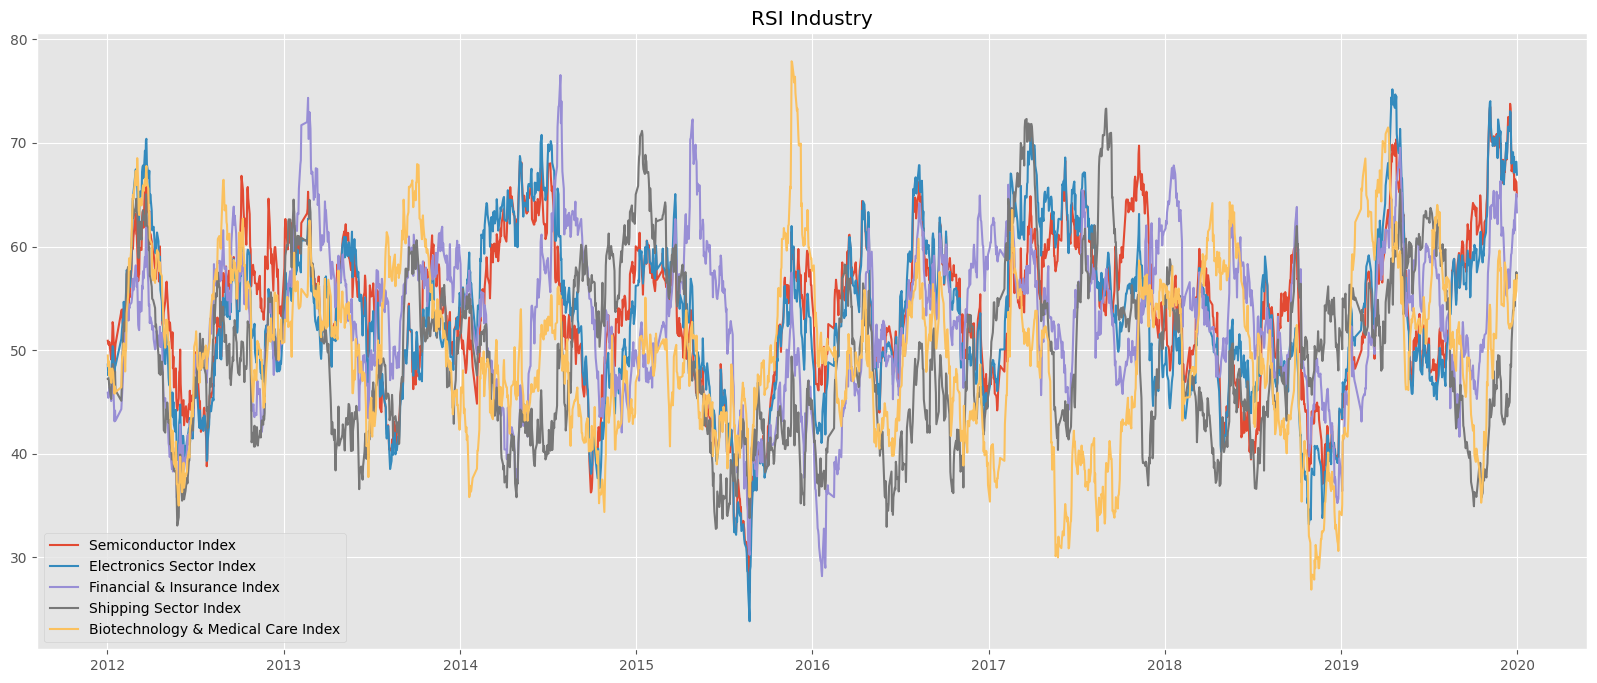

In [ ]:
from matplotlib import rcParams
# 1. 設定中文字體（依你環境調整字體名稱）
plt.rcParams['font.family'] = 'DejaVu Sans'  # matplotlib 的內建字型


selected_codes = [
    "IX0028",  # 半導體業指數
    "IX0027",  # 電子類指數
    "IX0039",  # 金融保險類指數
    "IX0037",  # 航運業類指數
    "IX0021",  # 生技醫療指
]

selected_names = [
    "Semiconductor Index",
    "Electronics Sector Index",
    "Financial & Insurance Index",
    "Shipping Sector Index",
    "Biotechnology & Medical Care Index",
]

rsi_s = rsi_df.loc['2012-01-01':'2020-01-01'].copy()
plt.style.use('ggplot')
plt.figure(figsize = (20, 8))
for idx, i in enumerate(selected_codes):
    plt.plot(rsi_s.index, rsi_s[i], label = selected_names[idx])
plt.title('RSI Industry')
plt.legend()
plt.show()

### 初步觀察與統計分析動機

我們可以簡單看出各個產業之間確實會有複雜的輪動關係，產業的 RSI 數值似乎呈現週期的先後關係。

但我們無法以肉眼去確認這些輪動關係是否成立，或是在統計上是顯著的關係，因此接下來將會進行前述提過的統計分析方法，以尋找**可靠的產業輪動情形**。


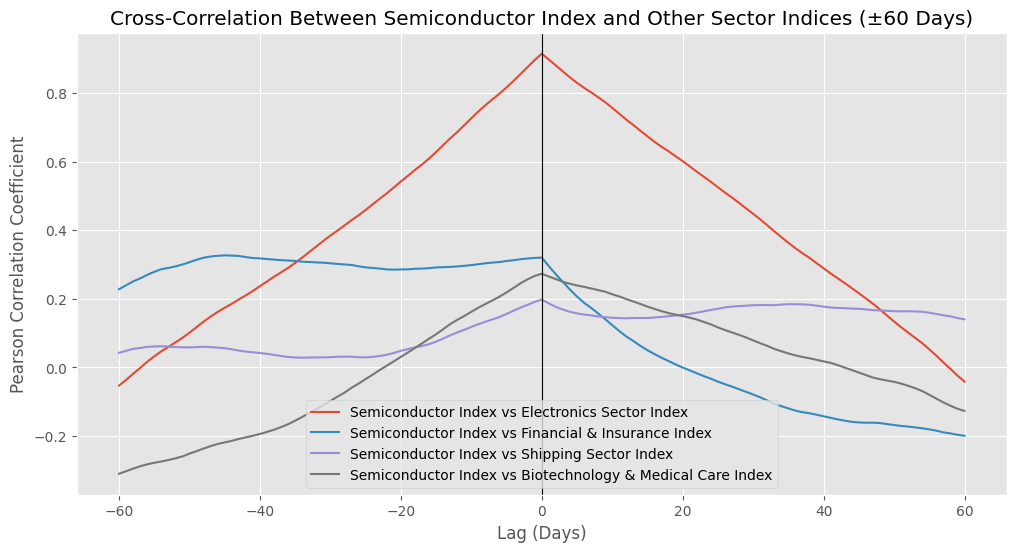

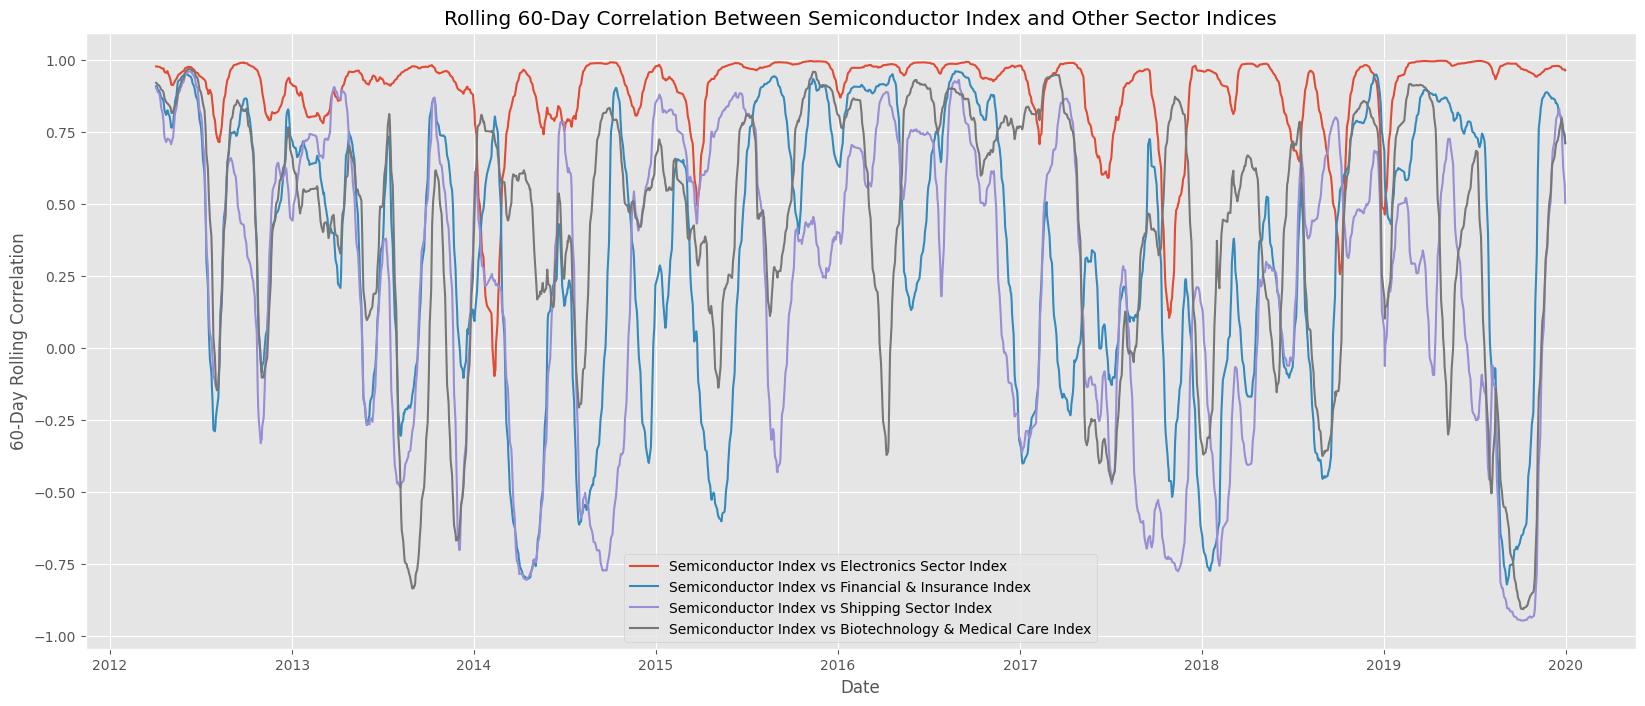

In [ ]:
# ─── 叉相關 (Cross-correlation) ────────────────────────────────
def cross_corr(series1: pd.Series, series2: pd.Series, max_lag: int = 60) -> pd.Series:
    """
    回傳 lag 從 -max_lag 到 +max_lag 時，series1 與 series2 的皮爾森相關係數。
    index=lag, value=corr
    """
    lags = np.arange(-max_lag, max_lag + 1)
    corrs = [series1.corr(series2.shift(lag)) for lag in lags]
    return pd.Series(corrs, index=lags)

base_code  = selected_codes[0]
base_name  = selected_names[0]
max_lag    = 60

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
for code, name in zip(selected_codes[1:], selected_names[1:]):
    cc = cross_corr(rsi_s[base_code], rsi_s[code], max_lag=max_lag)
    plt.plot(cc.index, cc.values, label=f"{base_name} vs {name}")

plt.axvline(0, color='black', lw=0.8)
plt.xlabel("Lag (Days)")
plt.ylabel("Pearson Correlation Coefficient")
plt.title(f"Cross-Correlation Between {base_name} and Other Sector Indices (±{max_lag} Days)")

plt.legend()
plt.show()


# ─── 2. 滾動相關 (Rolling Correlation) ────────────────────────────
window = 60  # 滑動視窗大小，可自行調整

plt.figure(figsize=(20, 8))
for code, name in zip(selected_codes[1:], selected_names[1:]):
    rc = rsi_s[base_code].rolling(window).corr(rsi_s[code])
    plt.plot(rc.index, rc.values, label=f"{base_name} vs {name}")

plt.xlabel("Date")
plt.ylabel(f"{window}-Day Rolling Correlation")
plt.title(f"Rolling {window}-Day Correlation Between {base_name} and Other Sector Indices")

plt.legend()
plt.show()

### 滾動相關係數結果分析

本圖透過 **60 日滾動相關係數** 觀察產業間相對連動性變化。

從時間序列來看：

- **電子產業**與半導體維持高度同步關係（紅色線），屬於結構性連動。
- 相較之下，**航運產業**與半導體之間的相關性則呈現週期性波動，顯示兩者之間可能存在具時間延遲性的輪動關係。
- **金融產業、生技產業**則展現出更多反向或不穩定的連動特徵，支持其為非同步或防禦性資產的判斷。

綜合上述，航運產業、金融產業以及生醫產業的表現可視為半導體產業走勢的潛在輪動關係，在產業輪動分析中具有實務參考價值。

---

從圖中可觀察各產業與半導體指數之間在 ±60 天內的 Pearson 滾動相關係數變化，藉此分析產業間的潛在領先與落後關係：

- 特別值得注意的是，**航運產業指數**與半導體指數的相關性在滯後約 **+30 天**達到高點（紫色線），代表當航運產業的相對表現較強時，約 30 天後半導體產業的表現才會明顯上升。  
  ⟶ 此一結構性延遲現象，支持「**航運 → 半導體**」的產業輪動假說。

- 就**金融保險產業**而言，圖中藍色線在 **-50 左右**達到最高，顯示出金融產業在半導體產業表現強勢之後約 **50 天**才會出現明顯上升的情況。  
  ⟶ 此現象支持「**半導體 → 金融**」的產業輪動假說。

- 相較之下，其他產業如**電子**與**生技醫療**的相關性曲線則呈現較對稱或平緩的分布，未顯示出明確的時間差峰值，顯示它們與半導體的關係較偏向同步或非輪動性質。


### 滯後相關係數分析結果

從圖中可觀察各產業與半導體指數之間在 ±60 天內的 Pearson 滾動相關係數變化，藉此分析產業間的潛在**領先與落後關係**。

- **航運產業**與半導體的相關性在滯後約 **+30 天**達到高點（紫色線），代表當航運產業的相對表現較強時，約 30 天後半導體產業的表現才會明顯上升。  
  ⟶ 此結構性延遲現象支持「**航運 → 半導體**」的產業輪動假說。

- **金融保險產業**的相關性在約 **–50 天**處達到高點（藍色線），表示半導體產業表現強勢後約 50 天，金融產業才開始有明顯的上升趨勢。  
  ⟶ 此現象支持「**半導體 → 金融**」的輪動假說。

- **電子**與**生技醫療**等產業的相關性曲線則呈現較對稱或平緩的分布，**未顯示出明確的時間差峰值**，表示它們與半導體的關係較偏向同步或非輪動性質。


In [ ]:
len(rsi_s['IX0037'])

1967

### Transfer Entropy（轉移熵）分析

轉移熵（Transfer Entropy, TE）是一種用來衡量一個時間序列對另一個時間序列**資訊傳遞強度**的統計方法，能夠捕捉**非線性**與**具方向性**的關聯性。

簡單來說，若「產業 A → 產業 B」的 TE 值顯著大於「產業 B → 產業 A」，可初步推論：
> **產業 A 的變化對產業 B 有較高預測性**，資訊主要由 A 傳遞至 B。

在本研究中，我們比較了**不同滯後期數（lag）下的 TE 結果**，若一個方向在多個滯後期中均持續顯著優於反方向，我們將其視為**具有統計穩健性與實務意義的資訊流**。

> *僅當資訊流方向在多數滯後期數下保持一致時，我們才會認定該產業間存在穩定的 Transfer Entropy 關係。*



In [ ]:
import numpy as np
import pandas as pd
from pyinform.transferentropy import transfer_entropy

k = 8
rsi_shipping = rsi_s['IX0037']
rsi_semiconductor = rsi_s['IX0028']

# 離散化 RSI 到三等分（pyinform 需要離散狀態資料）
def discretize_rsi(series):
    return pd.qcut(series, q=3, labels=False)

x = discretize_rsi(rsi_shipping).astype(int).tolist()       # 航運 RSI（輸入）
y = discretize_rsi(rsi_semiconductor).astype(int).tolist()  # 半導體 RSI（輸出）

# 計算 Transfer Entropy（從 X → Y）
te_xy = transfer_entropy(x, y, k=k)
te_yx = transfer_entropy(y, x, k=k)

print(f"Transfer Entropy（航運 → 半導體）: {te_xy:.4f}")
print(f"Transfer Entropy（半導體 → 航運）: {te_yx:.4f}")


Transfer Entropy（航運 → 半導體）: 0.0947
Transfer Entropy（半導體 → 航運）: 0.0592


In [ ]:
for q in [3, 4, 5]:
    for k in [3, 5, 7]:
        x = pd.qcut(rsi_s['IX0037'], q=q, labels=False).astype(int).tolist()
        y = pd.qcut(rsi_s['IX0028'], q=q, labels=False).astype(int).tolist()
        try:
            te_xy = transfer_entropy(x, y, k=k)
            te_yx = transfer_entropy(y, x, k=k)
            print(f"q={q}, k={k} → TE 航 → 半: {te_xy:.4f} | 半 → 航: {te_yx:.4f}")
        except:
            print(f"q={q}, k={k} → 無法計算")


q=3, k=3 → TE 航 → 半: 0.0177 | 半 → 航: 0.0155
q=3, k=5 → TE 航 → 半: 0.0539 | 半 → 航: 0.0376
q=3, k=7 → TE 航 → 半: 0.0866 | 半 → 航: 0.0589
q=4, k=3 → TE 航 → 半: 0.0504 | 半 → 航: 0.0389
q=4, k=5 → TE 航 → 半: 0.1068 | 半 → 航: 0.0943
q=4, k=7 → TE 航 → 半: 0.1303 | 半 → 航: 0.1228
q=5, k=3 → TE 航 → 半: 0.0781 | 半 → 航: 0.0805
q=5, k=5 → TE 航 → 半: 0.1784 | 半 → 航: 0.1617
q=5, k=7 → TE 航 → 半: 0.2021 | 半 → 航: 0.1698


In [ ]:
for q in [3, 4, 5]:
    for k in [3, 5, 7]:
        x = pd.qcut(rsi_s['IX0039'], q=q, labels=False).astype(int).tolist()  # 金融業 RSI
        y = pd.qcut(rsi_s['IX0028'], q=q, labels=False).astype(int).tolist()  # 半導體 RSI
        try:
            te_xy = transfer_entropy(x, y, k=k)
            te_yx = transfer_entropy(y, x, k=k)
            print(f"q={q}, k={k} → TE 金→半: {te_xy:.4f} | 半→金: {te_yx:.4f}")
        except:
            print(f"q={q}, k={k} → 無法計算")


q=3, k=3 → TE 金→半: 0.0188 | 半→金: 0.0164
q=3, k=5 → TE 金→半: 0.0469 | 半→金: 0.0538
q=3, k=7 → TE 金→半: 0.0780 | 半→金: 0.0811
q=4, k=3 → TE 金→半: 0.0515 | 半→金: 0.0350
q=4, k=5 → TE 金→半: 0.1025 | 半→金: 0.0953
q=4, k=7 → TE 金→半: 0.1231 | 半→金: 0.1228
q=5, k=3 → TE 金→半: 0.0868 | 半→金: 0.0781
q=5, k=5 → TE 金→半: 0.1692 | 半→金: 0.1842
q=5, k=7 → TE 金→半: 0.2081 | 半→金: 0.2121


In [ ]:
for q in [3, 4, 5]:
    for k in [3, 5, 7]:
        x = pd.qcut(rsi_s['IX0021'], q=q, labels=False).astype(int).tolist()  # 生醫 RSI
        y = pd.qcut(rsi_s['IX0028'], q=q, labels=False).astype(int).tolist()  # 半導體 RSI
        try:
            te_xy = transfer_entropy(x, y, k=k)
            te_yx = transfer_entropy(y, x, k=k)
            print(f"q={q}, k={k} : TE 生醫 → 半: {te_xy:.4f} | 半 → 生醫: {te_yx:.4f}")
        except:
            print(f"q={q}, k={k} : 無法計算")


q=3, k=3 : TE 生醫 → 半: 0.0139 | 半 → 生醫: 0.0169
q=3, k=5 : TE 生醫 → 半: 0.0487 | 半 → 生醫: 0.0333
q=3, k=7 : TE 生醫 → 半: 0.0779 | 半 → 生醫: 0.0494
q=4, k=3 : TE 生醫 → 半: 0.0471 | 半 → 生醫: 0.0340
q=4, k=5 : TE 生醫 → 半: 0.1050 | 半 → 生醫: 0.1089
q=4, k=7 : TE 生醫 → 半: 0.1432 | 半 → 生醫: 0.1500
q=5, k=3 : TE 生醫 → 半: 0.0826 | 半 → 生醫: 0.0789
q=5, k=5 : TE 生醫 → 半: 0.1774 | 半 → 生醫: 0.1569
q=5, k=7 : TE 生醫 → 半: 0.1994 | 半 → 生醫: 0.2007


### Transfer Entropy（轉移熵）分析

轉移熵（Transfer Entropy, TE）是一種用來衡量一個時間序列對另一個時間序列資訊傳遞強度的指標，能夠捕捉非線性與方向性的關聯性。簡單來說，如果「產業 A → 產業 B」的 TE 值大於反方向的 TE 值，就可以初步推論：A 的變化對 B 有較高的預測性，資訊由 A 傳遞至 B。

---

#### 航運產業對半導體產業

| 滯後期數（交易日） | TE值 航 → 半 | TE值 半 → 航 | 資訊流方向   |
|-------------------|--------------|--------------|--------------|
| 3                 | 0.0177       | 0.0155       | 航 → 半       |
| 5                 | 0.0539       | 0.0376       | 航 → 半       |
| 7                 | 0.0866       | 0.0589       | 航 → 半       |

---

#### 金融保險產業對半導體產業

| 滯後期數（交易日） | TE值 金 → 半 | TE值 半 → 金 | 資訊流方向   |
|-------------------|--------------|--------------|--------------|
| 3                 | 0.0188       | 0.0164       | 金 → 半       |
| 5                 | 0.0469       | 0.0538       | 半 → 金       |
| 7                 | 0.0780       | 0.0811       | 半 → 金       |

---

#### 生醫產業對半導體產業

| 滯後期數（交易日） | TE值 生醫 → 半 | TE值 半 → 生醫 | 資訊流方向   |
|-------------------|----------------|----------------|--------------|
| 3                 | 0.0139         | 0.0169         | 半 → 生醫     |
| 5                 | 0.0487         | 0.0333         | 生醫 → 半     |
| 7                 | 0.0779         | 0.0494         | 生醫 → 半     |

---

綜合轉移熵（Transfer Entropy）分析結果，本文章發現**航運產業對半導體產業的資訊流動方向在各滯後期數（k = 3, 5, 7）下皆保持一致**，且 TE 值隨滯後期數增加而穩定上升，顯示該資訊傳遞關係具有良好的方向穩定性與時間一致性，可視為一項相對可靠的領先訊號來源。

相較之下，金融保險與生技醫療產業對半導體產業的資訊流動方向則在不同滯後期數下出現變化，例如在短期內呈現 A → B 的資訊流動，但在中長期滯後期數下反轉為 B → A，反映其資訊傳遞關係對參數設定具高度敏感性，**缺乏穩定方向性與一致性**，不利於進一步推論其因果性或應用於預測模型中。

因此，若以產業間資訊傳遞作為資產配置或交易策略的依據，**航運產業對半導體的資訊流動關係相對具備較高的解釋力與應用潛力**；而其他產業則應更審慎處理其不穩定結果，避免過度詮釋或誤導決策。

---

結合上述三種分析方法的結果，我們認為**航運產業會是半導體產業的領先指標**，並以此為依據進行後續的策略邏輯的設計。
